# Project: Wrangling and Analyze Data

## Data Gathering
In this section I will be gathering all data needed for the analysis.

In [1]:
#importing the necessary libraries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import requests
import tweepy
import json
import os
from tweepy import OAuthHandler
from timeit import default_timer as timer
import datetime as dt
import time


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#downloading the WeRateDogs Twitter archive data
archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Using Requests library to download and save to file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file
with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'images'
images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')

3. Use the Tweepy library to query additional data via the Twitter API.

In [4]:
# key generated to source the needed data from twitter
consumer_key = ''  
consumer_secret = ''
access_token = ''
access_secret = ''

#creating the tweepy api object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,
                wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

rtw_fav_count = []
page_no_exist = []

with open('tweet_json.txt', mode="w") as file:
    for i in list(archive.tweet_id):
        try:
            tweet = api.get_status(str(i))
            file.write(json.dumps(tweet._json))
            rtw_fav_count.append({
                'tweet_id' : str(i),
                'retweet_count' : tweet._json['retweet_count'],
                'favorite_count' : tweet._json['favorite_count']
            })
        except:
            page_no_exist.append(i) 

Rate limit reached. Sleeping for: 324
Rate limit reached. Sleeping for: 736
Rate limit reached. Sleeping for: 738


In [5]:
#creating a DataFrame from the tweet data that i just retrieved using tweepy
rtw_fav_count = pd.DataFrame(rtw_fav_count, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues will be our newt step. We will detect and document at quality issues and tidiness issues.

In [6]:
#assessing the archive dataframe visually
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
#visually assessing the dataset by sample method
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
1271,709409458133323776,NaN,NaN,2016-03-14 16:02:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Billy. He sensed a squirrel. 8/10 damn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709409458...,8,10,Billy,None,None,None,None
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
1926,674053186244734976,NaN,NaN,2015-12-08 02:29:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674053186...,10,10,Stanley,None,None,None,None
1827,676430933382295552,NaN,NaN,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Duke. He's an Urban Parmesan. They know h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676430933...,10,10,Duke,None,None,None,None


In [8]:
# Print some random examples from columns values
# random number just to check if we can find something suspicious
print(archive['text'][900])
print(archive['name'][12])

Meet Boston. He's worried because his tongue won't fit all the way in his mouth. 12/10 it'll be ok deep breaths pup https://t.co/rfWQ4T9iQj
None


In [9]:
# Assessing the archive data programmaticaly
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> quality- tweet_it datatype should be object.

> quality- only original rating are needed for the analysis, so 181 non-null retweeted_status would be dropped

> quality- the in_reply and retweeted columns is not needed for the analysis after the non-nulls are dropped

> tidiness- the dog stages should be categorised in one column

In [10]:
#computing the statistics of the data in the archive dataframe
#to check for inaccurate data
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
#checking for the sum of each unique data
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

> For the numerator, since the lowest numerator is 15 (considering others as outliers), the max numerator shoul be set to 15.

In [12]:
#checking for the sum of each unique data
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> 2333 of the denominator is 10, others should be fixed to 10

In [13]:
#checking for the sum of each unique data
archive['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
Sadie           8
the             8
Buddy           7
Daisy           7
an              7
Toby            7
Bailey          7
Dave            6
Jax             6
Rusty           6
Jack            6
Oscar           6
Koda            6
Scout           6
Bella           6
Leo             6
Stanley         6
Milo            6
Sammy           5
             ... 
Pupcasso        1
Bookstore       1
Chuq            1
O               1
Link            1
Lulu            1
Simba           1
Mary            1
officially      1
Murphy          1
Jebberson       1
Mason           1
Nimbus          1
Henry           1
Vince           1
Bode            1
Marlee          1
Edgar           1
Oddie           1
Karma           1
Chaz            1
Kendall         1
Gilbert         1
Maks            1
Mark      

> the words a, an, none, and the does not seem like a name and should be replaced with NaN

In [14]:
archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

This shows that the archive have four distinct source, which can be give simpler names.

In [15]:
#visually checking the image dataframe using the sample method.
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
527,676617503762681856,https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg,1,Chihuahua,0.841084,True,Pomeranian,0.120530,True,Pekinese,0.006600,True
1460,778039087836069888,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,German_shepherd,0.717776,True,malinois,0.111175,True,Norwegian_elkhound,0.058802,True
1431,773247561583001600,https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg,1,seat_belt,0.713588,False,miniature_pinscher,0.083369,True,Brabancon_griffon,0.075696,True
164,668975677807423489,https://pbs.twimg.com/media/CUit1O1WoAEBHjj.jpg,1,basset,0.605437,True,Welsh_springer_spaniel,0.184783,True,Saint_Bernard,0.116299,True
1811,832998151111966721,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,1,boxer,0.539036,True,French_bulldog,0.317617,True,bull_mastiff,0.093928,True
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False
439,674436901579923456,https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg,1,acorn_squash,0.375392,False,Shih-Tzu,0.105416,True,Lhasa,0.072832,True
1784,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,golden_retriever,0.573140,True,cocker_spaniel,0.111159,True,gibbon,0.094127,False
1133,728409960103686147,https://pbs.twimg.com/media/ChvU_DwWMAArx5L.jpg,1,Siamese_cat,0.478278,False,Saint_Bernard,0.094246,True,king_penguin,0.082157,False
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True


In [16]:
#checking for the number of rows and column in the image dataframe
images.shape

(2075, 12)

In [17]:
#checking the number of duplicates in the image prediction dataframe
sum(images.duplicated())

0

In [18]:
#displaying the structure of the image prediction dataframe
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> the img_num should be dropped, it is not needed is this analysis

In [19]:
#assessing the retweet count and favourite count data visually
rtw_fav_count.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33693
1,892177421306343426,5272,29219
2,891815181378084864,3464,21973
3,891689557279858688,7191,36783
4,891327558926688256,7715,35177


> the retweet and favourite count dataset should be merged with the Archive dataset, since it is an additional data for it.

In [20]:
#assessing the retweet count and favourite count data pragmatically
rtw_fav_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null object
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


> the dataset is a complete dataset since there are no null values and is clean.

In [21]:
#checking the number of rows in the retweet and favourite count DataFrame
len(rtw_fav_count)

2327

### Quality issues

##### archive:
1. There are non null retweeted_status and for the analysis it cannot be included because only original rating is required.

2. Redundant 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id', and 'expanded_urls' rows, they are not needed for the analysis.

3. The HTML tags in the source_list column is too long, version or type of device used should be extracted from it and used instead.

4. Name contains 'name' that does not seem like names, 'None', 'a' or 'an' and 'the' should be replaced with 'NaN'.

5. The +0000 in the timestamp is redundant, so it will be removed and change the timestamp datatype.

6. 2333 of the rating_denominator is 10 out of the 2355 data in the arvchive dataset, set all denominator to 10.

7. The archive 'tweet_id' should be object datatype not int.

8. The images 'tweet_id' should be object datatype.

##### images:
9. img_num is not needed for the analysis and should be dropped

### Tidiness issues

##### images:
10. Extract the correct predictions from each prediction variable in such a way as to prefer the first prediction and combine these predictions with tweet_data_archived.

##### archive:
11. Classify the dog stage in one column, to do that I will be creating a new dataset and merge it back with the archive dataset then drop the 'doggo', 'puppo', pupper, and 'floofer' columns.

12. Merge archive, correct image prediction and retweet/favourite count dataset on tweet_id column.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
archive_df = archive.copy()
images_df = images.copy()
rtw_fav_count_df = rtw_fav_count.copy()

### Archive Quality

### Issue #1:

#### Define: 
There are non null retweeted_status and for the analysis it cannot be included because only original rating is required.
Drop the non-null retweet row data from archive

#### Code

In [23]:
retweet_index = list(archive_df[archive_df["retweeted_status_id"].isnull()==False].index)

archive_df.drop(axis=0, index=retweet_index, inplace=True)

#### Test

In [24]:
for retweet in retweet_index:
    if retweet in list(archive_df.index):
        print('Found a retweet')
    else:
        print('no retweet')

no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet
no retweet

In [25]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

All the retweeted ratings have been dropped and only the original retweets are left.

### Issue #2:

#### Define
Redundant 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id' rows and 'expanded_urls', they are not needed for the analysis. I will be drooping these columns.

#### Code

In [26]:
archive_df.drop(columns= ['in_reply_to_status_id', 
                          'in_reply_to_user_id', 
                          'retweeted_status_id', 
                          'retweeted_status_user_id', 
                          'retweeted_status_timestamp', 
                          'expanded_urls'], 
                inplace= True)

#### Test

In [27]:
#testing to see if the columns have been dropped 
archive_df.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


All columns not needed for the analysis in the archive dataset have been dropped.

### Issue #3:

#### Define: 
The HTML tags in the source_list column is too long, version or type of device used should be extracted from it and used instead.

#### Code

In [28]:
#changing each unique source to a shorter name
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 
               '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 
               '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 
               '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
         ]
#to this
source_new_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']

#using this code
[archive_df.source.replace(source_list, source_new_list, inplace=True) 
for current_source, new_source in zip(source_list, source_new_list)];


#### Test

In [29]:
archive_df['source'].value_counts()

Twitter for iPhone    2042
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

This is a much cleaner and relatable source list.

### Issue #4:

#### Define: 
Name contains 'name' that does not seem like names, 'None', 'a' or 'an' and 'the' should be replaced with 'NaN'

#### Code

In [30]:
archive_df.name.replace(['None', 'a', 'an', 'the'], np.nan, inplace=True)

#### Test

In [31]:
archive_df.name.value_counts().sample(10)

Joshwa     1
Goliath    1
Jett       1
Jimison    2
Peanut     1
Mack       1
Mark       1
getting    2
Jarvis     1
Malcolm    3
Name: name, dtype: int64

After replacing the unsual names with NaN, I used random value count sample to check.

### Issue #5:

#### Define: 
The +0000 in the timestamp is redundant, so it will be removed and change the timestamp datatype.

#### Code

In [32]:
archive_df['timestamp'] = pd.to_datetime(archive['timestamp'])

#### Test

In [33]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1426 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


In [34]:
archive_df['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### Issue #6:

#### Define: 
2333 of the rating_denominator is 10 out of the 2355 data in the arvchive dataset, set all denominator to 10. since all rows will have a constant number, it will be dropped

#### Code

In [35]:
archive_df.drop('rating_denominator', axis = 1, inplace = True)

#### Test

In [36]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id            2175 non-null int64
timestamp           2175 non-null datetime64[ns]
source              2175 non-null object
text                2175 non-null object
rating_numerator    2175 non-null int64
name                1426 non-null object
doggo               2175 non-null object
floofer             2175 non-null object
pupper              2175 non-null object
puppo               2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 186.9+ KB


The denominator was dropped, it is said to be 10 for all data.

### Issue #7:

#### Define:
The archive 'tweet_id' should be object datatype.

#### Code

In [37]:
archive_df.tweet_id = archive_df.tweet_id.astype(str)

#### Test

In [38]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id            2175 non-null object
timestamp           2175 non-null datetime64[ns]
source              2175 non-null object
text                2175 non-null object
rating_numerator    2175 non-null int64
name                1426 non-null object
doggo               2175 non-null object
floofer             2175 non-null object
pupper              2175 non-null object
puppo               2175 non-null object
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 186.9+ KB


The tweet id is now an object type

### Issue #8:

#### Define:
The images 'tweet_id' should be object datatype.


#### Code

In [39]:
images_df.tweet_id = images_df.tweet_id.astype(str)

#### Test

In [40]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Images Quality

### Issue #9:

#### Define:
img_num is not needed for the analysis and should be dropped

#### Code

In [41]:
images_df.drop('img_num', axis = 1, inplace = True)

#### Test

In [42]:
images_df.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


The img_num column is no longer in the images dataset.

## Tidiness

### Issue #10:

#### Define:
Extract the correct predictions from each prediction variable in such a way as to prefer the first prediction and combine these predictions with tweet_data_archived

#### Code

In [43]:
# Extract all of the correct predictions
image_pred_cols = images_df.columns.tolist()
pred_col_pairs = [[image_pred_cols[i], image_pred_cols[i+2]] 
                  for i in range(1, 3)]

dog_breeds_partial = []
for pred_col_pair in pred_col_pairs:
    p, p_dog = pred_col_pair
    tmp_pred = images_df.loc[images_df[p_dog] == True, ['tweet_id', p]]                                                        
    dog_breeds_partial.append(tmp_pred.rename(columns={p: 'dog_breed'}))
dog_breeds = pd.concat(dog_breeds_partial, ignore_index=True, sort=True)

# Combine correct predictions with tweet_data_archived
dog_breeds.drop_duplicates('tweet_id', inplace=True)
images_df = pd.merge(images_df, dog_breeds, on='tweet_id', how='left')

In [44]:
images_df.head(1)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel


In [45]:
images_df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1, inplace = True)

In [46]:
images_df.head()

,tweet_id,jpg_url,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


#### Test

In [47]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id     2075 non-null object
jpg_url      2075 non-null object
dog_breed    1533 non-null object
dtypes: object(3)
memory usage: 64.8+ KB


### Issue #11:

#### Define:
Classify the dog stage in one column, to do that I will be creating a new dataset and merge it back with the archive dataset then drop the 'doggo', 'puppo', pupper, and 'floofer' columns.

#### Code

In [48]:
archive_df_class = archive_df[~((archive_df['doggo'] != 'doggo') & (archive_df['floofer'] != 'floofer') & (archive_df['pupper'] != 'pupper') & (archive_df['puppo'] != 'puppo'))].replace('None', np.nan)

In [49]:
archive_df_class = pd.melt(archive_df_class,
                           id_vars = ['tweet_id', 
                                      'timestamp', 
                                      'source', 
                                      'text', 
                                      'rating_numerator', 
                                      'name'],
                           var_name = 'var_name', 
                           value_name = 'classifier')

In [50]:
archive_df_class.dropna(subset=['classifier'], inplace = True)

In [51]:
archive_df_class.drop(['timestamp', 
                       'source', 
                       'text', 
                       'rating_numerator', 
                       'name', 
                       'var_name'], 
                 axis = 1, 
                 inplace=True)

#### Test

In [52]:
archive_df_class.sample(5)

,tweet_id,classifier
92,786363235746385920,doggo
768,800459316964663297,pupper
891,705975130514706432,pupper
927,692417313023332352,pupper
718,837110210464448512,pupper


In [53]:
archive_df_class['classifier'].value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: classifier, dtype: int64

#### Define:
Merging the new dog classifier dataset with the archive dataset.

#### Code

In [54]:
archive_df = archive_df.merge(archive_df_class, on='tweet_id', how='left')

In [55]:
archive_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [56]:
archive_df.head()

,tweet_id,timestamp,source,text,rating_numerator,name,classifier
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,Franklin,NaN


The dog stages have been classified and merged to the archived dataset.

### Issue #12:

#### Define:
Merge archive, correct image prediction and retweet/favourite count dataset on tweet_id column.

#### Code

In [57]:
##archive_df = pd.merge(archive_df,
                      # rtw_fav_count_df,
                    #  on='tweet_id')
        
archive_df = pd.merge(pd.merge(archive_df,
                               rtw_fav_count_df,
                               on='tweet_id'
                              ), 
                      images_df,
                      on='tweet_id')

#### Test

In [58]:
archive_df.head(1)

,tweet_id,timestamp,source,text,rating_numerator,name,classifier,retweet_count,favorite_count,jpg_url,dog_breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,Phineas,NaN,6969,33693,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
twitter_archive_master = archive_df.copy()
twitter_archive_master.to_csv('twitter-archive-master.csv', index=False)

## Analyzing and Visualizing Data

In [60]:
#importing additional libraries needed for visualisation
import seaborn as sns
import itertools
import warnings

**1. What are the correlation between the retweet counts, favorite count and rating?**

One of the uniqueness of the WeRateDogs is there rating system, which can be above 10 but for the purpose of this analysis I would be limiting the numerator to a maximum of 15

In [61]:
# Set the maximum 'rating_numerator' to 15
twitter_archive_master.loc[twitter_archive_master['rating_numerator']>15, 'rating_numerator'] = 15

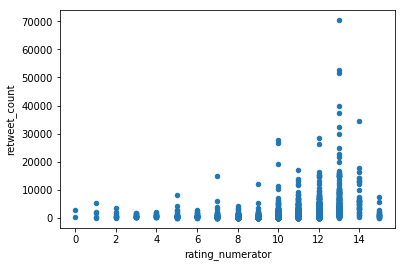

In [62]:
#Let's look at the relationship between 'rating_numerator' and 'retweet_count'

twitter_archive_master.plot(x='rating_numerator',
                            y='retweet_count',
                            kind='scatter');

This shows a weak positive correlation between the retweet count and ratings.

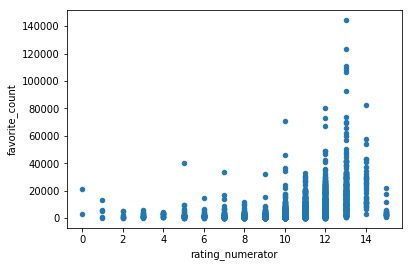

In [63]:
#Let's look at the relationship between 'rating_numerator' and 'favorite count'

twitter_archive_master.plot(x='rating_numerator',
                            y='favorite_count',
                            kind='scatter')

This shows a weak positive correlation between the favourite count and ratings.

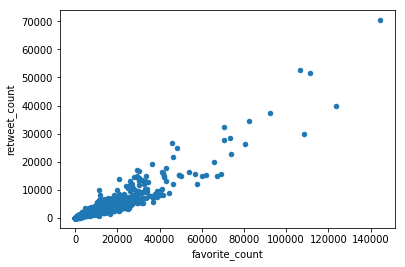

In [64]:
#Let's look at the relationship between 'rating_numerator' and 'retweet_count'

twitter_archive_master.plot(x='favorite_count',
                            y='retweet_count',
                            kind='scatter');

This shows a strong positive correlation between the retweet count and favourite counts.

**2. What are the most common top 10 breed and dog stage**

Plotting the bar chart of the top 10 most popular breed

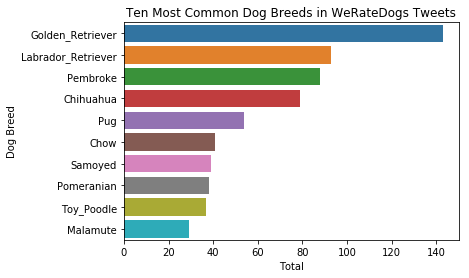

In [65]:
# Plot counts of the 10 most common dog breeds
top_breeds = (twitter_archive_master.dog_breed.value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog_breed', 'dog_breed': 'total'}))
top_breeds['dog_breed'] = top_breeds['dog_breed'].str.title()
ax = sns.barplot(x='total', y='dog_breed', data=top_breeds);
ax.set_title('Ten Most Common Dog Breeds in WeRateDogs Tweets');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

The above diagram shows the top ten rated breed in the werateDogs dataset. 

**3. What dog stage get the most ratings?**

**Plotting the bar chart of to show the most popular dog stage.**

In [66]:
# Extract separate dog types
classifier_mask = twitter_archive_master['classifier'].notnull()
classifier_raw = twitter_archive_master.classifier.loc[classifier_mask].str.split(',').tolist()
classifier = list(map(lambda x: x.strip(), 
                      itertools.chain.from_iterable(classifier_raw)))
classifier = np.array(classifier)

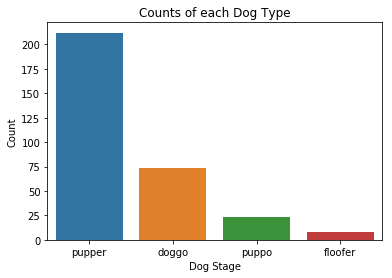

In [67]:
# Plot counts of each dog stage
plot_category_order = ['pupper', 'doggo', 'puppo', 'floofer']
ax = sns.countplot(x=classifier, order=plot_category_order);
ax.set_title('Counts of each Dog Type');
ax.set_ylabel('Count');
ax.set_xlabel('Dog Stage');

Pupper the the most popular rated stage of dogs